In [227]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import glob

In [228]:
path = 'C:/Users/evach/Documents/MSc/Diss_data/3_set_baseline/Latency/00_Dong/com/TLX/'
csv_files = glob.glob(path +'/*.csv')
t_df_lst = [pd.read_csv(i) for i in csv_files]

tlx_1 = t_df_lst[0]
tlx_2 = t_df_lst[1]
tlx_3 = t_df_lst[2]

In [229]:


def plt_TLX(tst_0 = tlx_1, tst_500 = tlx_2, tst_1kg = tlx_3, participant = 'Ignore', path = path):
  x = range(1,len(tst_0.columns))
  level_0, level_1, level_2 = [[] for i in range(0,3)]

  for i in pd.Index(tst_0['Test']):
    lst_NASA_name = pd.Index(tst_0['Test']).get_loc(i) 
    y0 = tst_0.iloc[lst_NASA_name].to_list()
    y_0_axis = y0[1:]
    y0 = [float(i) for i in y_0_axis]
    
    y1 = tst_500.iloc[lst_NASA_name].to_list()
    y_1_axis = y1[1:]
    y1 = [float(i) for i in y_1_axis]

    y2 = tst_1kg.iloc[lst_NASA_name].to_list()
    y_2_axis = y2[1:]
    y2 = [float(i) for i in y_2_axis]

    level_0.append(y0)
    level_1.append(y1)
    level_2.append(y2)

    plt.rcParams['figure.figsize'] = [10,5]
    # plt.plot(x,y0, label = '0ms')
    # plt.plot(x,y1,  label = '150ms')
    # plt.plot(x,y2,  label = '300ms')
    # plt.legend()
    # plt.title('NASA TLX plots over the 3 different latency experiment -  ' + i )
    # plt.xlabel('Trial numbers')
    # plt.ylabel('NASA TLX score - ' +i)
    # plt.autoscale(enable= True) 
    # # plt.savefig(path + i + ' NASA plt '+'.jpg') 
    # plt.show()
  return level_0,level_1,level_2

In [237]:
d = plt_TLX()
pd.DataFrame([d[0][0],d[0][1],d[0][2]])
data_name = [[] for i in range(0,len(NASA_names))]
len(data_name)

8

In [231]:
# each set of data has 8 rows; 8 questions
# combine question[i] for set 1,2 and 3
# create a data frame for each of the 8 question with sets combined: mental 1, mental 2, mental 3

def organise_sets(data = plt_TLX(), NASA_names =pd.Index(tlx_2['Test'])):
    s1 = data[0] # set 1
    s2 = data[1] # set 2
    s3 = data[2] # set 3
    data_name = [[] for i in range(0,len(NASA_names))]
    
    # set 1, set 2, set 3 index
    idx = [('set '+str(i+1)) for i in range(0,3)]

    for i in range(0,len(NASA_names)):
        data_name[i] = pd.DataFrame([s1[i],s2[i],s3[i]]) # 8*set 1

        # add a column that identify sets, then add the string name of the data
        data_name[i].index = pd.Series(idx)
        data_name[i].reset_index(inplace = True)
        data_name[i].index = pd.Series(NASA_names[i] for j in range(0,len(data_name[i])))
        data_name[i].reset_index(inplace = True)
        # reset the column name to 'Sets'
        data_name[i].rename(columns ={'index':'Sets','level_0': 'Test name'}, inplace = True)

    return data_name

tlx_all = organise_sets()

# len(tlx_all) ---> 8
tlx_all

[       Test name   Sets     0     1     2     3     4     5     6     7     8  \
 0  Mental demand  set 1  30.0  10.0  40.0  20.0  30.0  40.0  35.0  20.0  25.0   
 1  Mental demand  set 2  65.0  70.0  60.0  50.0  40.0  30.0  20.0  10.0  35.0   
 2  Mental demand  set 3  70.0  80.0  70.0  80.0  60.0  90.0  70.0  70.0  50.0   
 
       9  
 0  30.0  
 1  15.0  
 2  60.0  ,
           Test name   Sets     0     1     2     3     4     5     6     7  \
 0  Physical demand   set 1  20.0  10.0  50.0  20.0  30.0  45.0  35.0  20.0   
 1  Physical demand   set 2  60.0  70.0  60.0  50.0  60.0  30.0  20.0  15.0   
 2  Physical demand   set 3  70.0  75.0  80.0  80.0  80.0  90.0  70.0  60.0   
 
       8     9  
 0  30.0  30.0  
 1  40.0  15.0  
 2  60.0  60.0  ,
                              Test name   Sets     0     1     2     3     4  \
 0  Temporal performance ( how hurried)  set 1  10.0  10.0  30.0  10.0  20.0   
 1  Temporal performance ( how hurried)  set 2  40.0  60.0  50.0  30.0  30.0  

In [232]:
tlx_all[0].iloc[:,2:]

,0,1,2,3,4,5,6,7,8,9
0,30.0,10.0,40.0,20.0,30.0,40.0,35.0,20.0,25.0,30.0
1,65.0,70.0,60.0,50.0,40.0,30.0,20.0,10.0,35.0,15.0
2,70.0,80.0,70.0,80.0,60.0,90.0,70.0,70.0,50.0,60.0


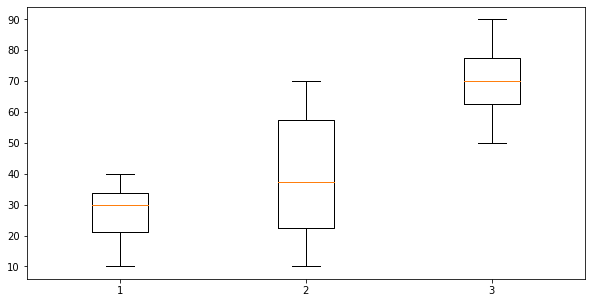

In [233]:
plt.boxplot([ tlx_all[0].iloc[0,2:] , tlx_all[0].iloc[1,2:] , tlx_all[0].iloc[2,2:]])
plt.show()

In [234]:
# tlx_all[0] ---> mental
# .iloc[0,2:]---> first row data, excluded the string data
participant = str(1)

def plt_sets(data_name = tlx_all, test ='Latency', NASA_names =pd.Index(tlx_2['Test'])):
    path = 'C:/Users/evach/Documents/MSc/Diss_data/3_set_baseline/'+test+'/combine/'
    # x = ['0ms delay', '150ms delay', '300ms delay']
    if test == 'Weighted':
        x =['0 g', '0.5 KG', '1 KG']
        x_l = 'Different levels of weights'
    else: 
        x = ['0ms delay', '150ms delay', '300ms delay']
        x_l = 'Different latency levels'

    data = [[] for i in range(0, len(data_name))]
    for i in range(0, len(data_name)):
        s1_data = data_name[i].iloc[0,2:]
        s2_data = data_name[i].iloc[1,2:]
        s3_data = data_name[i].iloc[2,2:]
        data[i] = [s1_data,s2_data,s3_data]

        plt.boxplot(data[i], labels = x)
        plt.title(NASA_names[i])
        plt.xlabel(x_l)
        plt.ylabel(NASA_names[i]+' score')
        plt.show()
        # plt.savefig(path+'p-'+participant+' '+NASA_names[i]+' variation at different '+test+' level'+'.jpg')


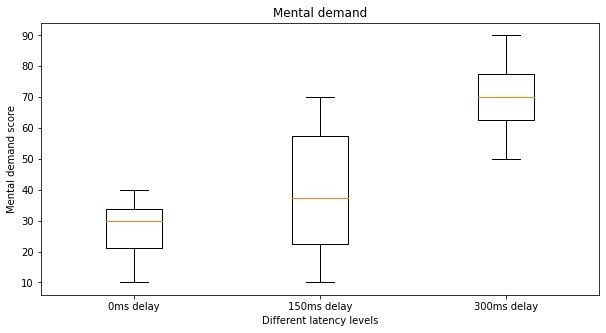

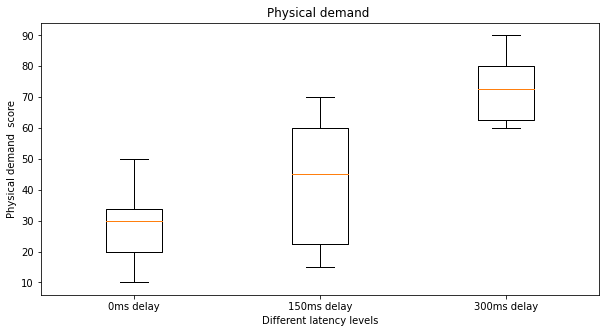

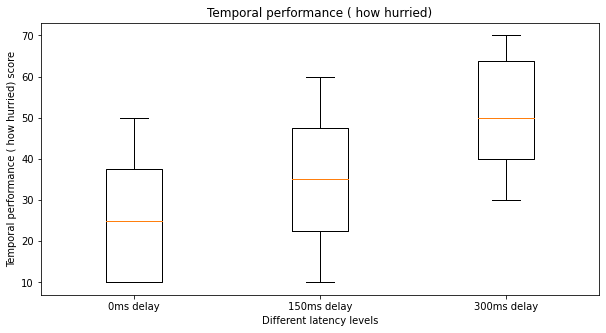

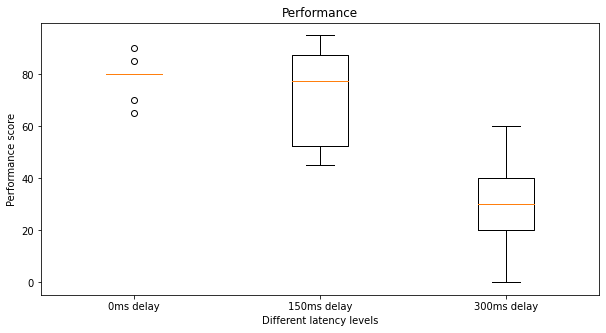

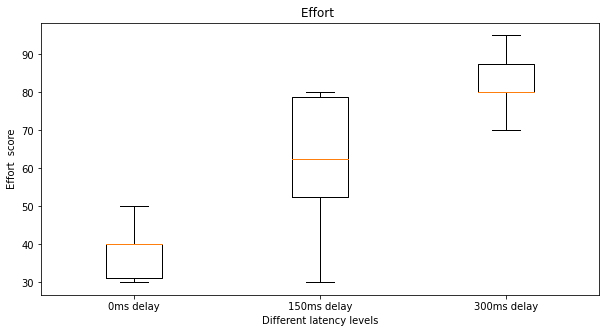

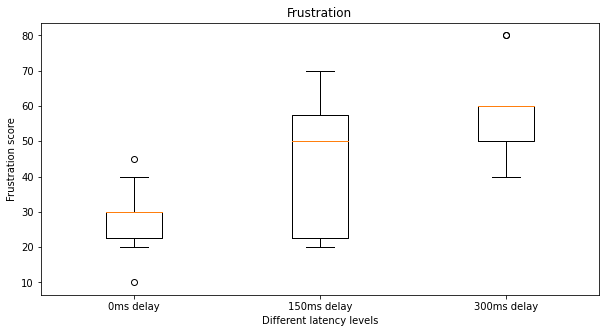

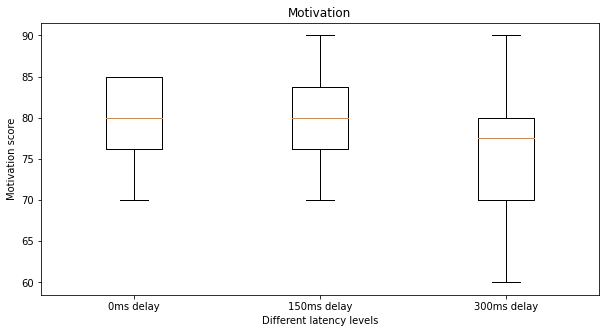

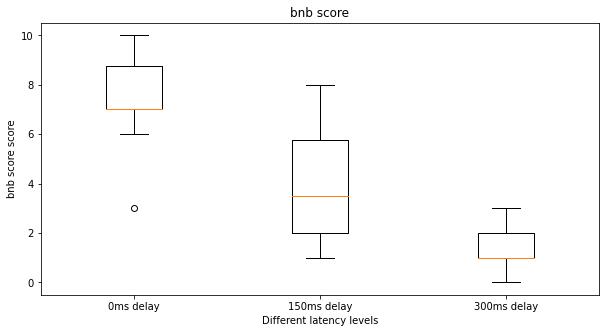

In [235]:
plt_sets()

# Make the data multiple user friendly

In [236]:
combine = pd.concat([tlx_all[i] for i in range(0,len(NASA_names))],axis=0)
combine.reset_index(drop=True,inplace=True)
path = 'C:/Users/evach/Documents/MSc/Diss_data/3_set_baseline/Latency/combine/'

# combine.to_csv(path+participant+'NASA.csv')
